## Bibliotecas

In [1]:
import pandas as pd
import numpy as np
import streamlit as st
from sklearn.linear_model import LinearRegression #explicarei mais a frente o motivo de ser regressão logística
from sklearn.model_selection import train_test_split 

# Plotagem
from yellowbrick.regressor import ResidualsPlot

# métricas

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_log_error

# para normalização
from sklearn.preprocessing import MinMaxScaler

In [2]:
data_model_01 = pd.read_csv('dados_pro_target_model.csv') # dados target produtividade
data_model_02 = pd.read_csv('variáveis_explicativas_agro.csv') # variáveis explicativas

In [3]:
data_model_02 = data_model_02[['QV2M','T2M_RANGE']]


In [4]:
dados_model = pd.merge(data_model_02, data_model_01[['Target_Produtividade']], left_index=True, right_index=True, how='inner')

In [5]:
dados_model = (dados_model)

In [6]:
dados_model

,QV2M,T2M_RANGE,Target_Produtividade
0,0.737540,0.507196,2530.71
1,0.812301,0.315744,3006.21
2,0.747614,0.224160,2196.36
3,0.760339,0.181422,2835.71
4,0.766702,0.337985,2072.86
...,...,...,...
344,0.747614,0.307894,2980.21
345,0.708378,0.208024,2503.50
346,0.679215,0.324466,2762.79
347,0.676034,0.492804,2949.36


## foda

In [7]:

explicativas = dados_model.drop(axis=1,columns='Target_Produtividade')
resposta  = dados_model['Target_Produtividade']



In [8]:
resposta = pd.DataFrame(resposta)

In [9]:
print(dados_model.columns)


Index(['QV2M', 'T2M_RANGE', 'Target_Produtividade'], dtype='object')


In [10]:

# Instanciando o scaler
scaler = MinMaxScaler()

# Selecionando colunas numéricas
numeric_cols = resposta.select_dtypes(include=['float64', 'int64','int32']).columns

# Aplicando a normalização
resposta[numeric_cols] = scaler.fit_transform(resposta[numeric_cols])
resposta.shape

(349, 1)

In [11]:


x_train, x_test, y_train, y_test = train_test_split(explicativas, resposta, test_size = 0.3, random_state = 0)

In [12]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape 

((244, 2), (105, 2), (244, 1), (105, 1))

In [15]:
explicativas

,QV2M,T2M_RANGE
0,0.737540,0.507196
1,0.812301,0.315744
2,0.747614,0.224160
3,0.760339,0.181422
4,0.766702,0.337985
...,...,...
344,0.747614,0.307894
345,0.708378,0.208024
346,0.679215,0.324466
347,0.676034,0.492804


## Descobrindo melhor modelo - Não recomendo em caso de não entendimento sobre os dados, por isso sempre leiam os metadados

In [39]:
from tpot import TPOTRegressor

tpot = TPOTRegressor(generations=5, population_size=20, random_state=42, verbosity=2)
tpot.fit(x_train, y_train)
print("Desempenho do melhor modelo:", tpot.score(x_test, y_test))
tpot.export('best_model_pipeline.py')


c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\tpot\builtins\__init__.py:36: UserWarning: Warning: optional dependency `torch` is not available. - skipping import of NN models.
  warnings.warn("Warning: optional dependency `torch` is not available. - skipping import of NN models.")
c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Optimization Progress:   0%|          | 0/120 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: -0.02789884530071125

Generation 2 - Current best internal CV score: -0.027815479255522135

Generation 3 - Current best internal CV score: -0.027815479255522135

Generation 4 - Current best internal CV score: -0.027815479255522135

Generation 5 - Current best internal CV score: -0.027815479255522135

Best pipeline: ExtraTreesRegressor(input_matrix, bootstrap=True, max_features=0.7500000000000001, min_samples_leaf=17, min_samples_split=11, n_estimators=100)
Desempenho do melhor modelo: -0.026061211634453057


c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [41]:
from sklearn.linear_model import LassoLarsCV

import numpy as np


# Crie um objeto LassoLarsCV
lasso_lars = LassoLarsCV(cv=5)  # O parâmetro cv especifica o número de dobras para validação cruzada

# Treine o modelo nos dados de treinamento
lasso_lars.fit(x_train, y_train)

# Obtenha o valor ótimo do parâmetro de regularização (alfa)
best_alpha = lasso_lars.alpha_
print(f"Melhor valor de alfa: {best_alpha}")

# Obtenha os coeficientes do modelo
coefficients = lasso_lars.coef_
print("Coeficientes do modelo:")
print(coefficients)

# Faça previsões nos dados de teste
predictions = lasso_lars.predict(x_test)

# Avalie o desempenho do modelo
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, predictions)
print(f"Erro quadrático médio (MSE) no conjunto de teste: {mse}")


Melhor valor de alfa: 0.0027698048418159584
Coeficientes do modelo:
[0. 0.]
Erro quadrático médio (MSE) no conjunto de teste: 0.026030081654177903


c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


## Regressão - Aplicação do Modelo

In [16]:
lr = LinearRegression()

lr.fit(x_train,y_train)

LinearRegression()

In [17]:




# Use um modelo de regressão linear como exemplo
modelo = LinearRegression()

# Treine o modelo
lr.fit(x_train, y_train)

# Faça previsões
previsoes = lr.predict(x_test)

# Avalie o desempenho do modelo (substitua pela métrica apropriada para o seu problema)
erro = mean_squared_error(y_test, previsoes)

print(f'Erro: {erro}')


Erro: 0.02608150918840242


## métricas

In [18]:
erro


mae = mean_absolute_error(y_test, previsoes)
print(f'Erro Absoluto Médio (MAE): {mae}')

Erro Absoluto Médio (MAE): 0.13050806037965235


In [19]:
rmse = np.sqrt(mean_squared_error(y_test, previsoes))
print(f'Raiz do Erro Quadrático Médio (RMSE): {rmse}')

Raiz do Erro Quadrático Médio (RMSE): 0.16149770644935618


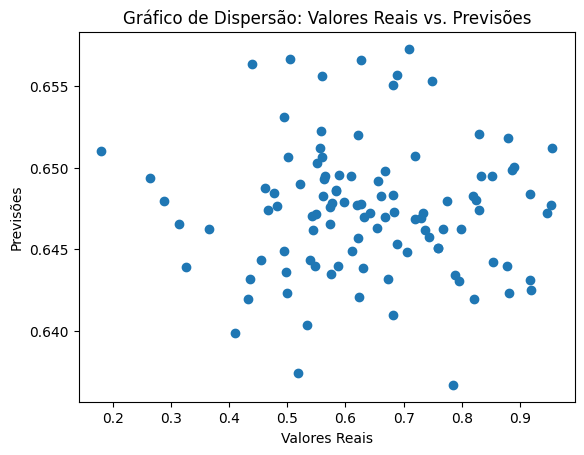

In [32]:
import matplotlib.pyplot as plt

# Plotar gráfico de dispersão
plt.scatter(y_test, previsoes)
plt.xlabel('Valores Reais')
plt.ylabel('Previsões')
plt.title('Gráfico de Dispersão: Valores Reais vs. Previsões')
plt.show()



### Mapa de Resíduos

c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


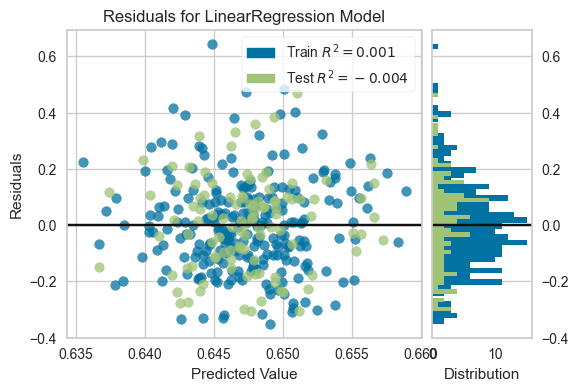

<AxesSubplot: title={'center': 'Residuals for LinearRegression Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [36]:
fig, ax = plt.subplots(figsize=(6,4))
rpv = ResidualsPlot(lr)
rpv.fit(x_train,y_train)
rpv.score(x_test,y_test)
rpv.poof()


In [37]:
fig.savefig('images.png',dpi=300)